<a href="https://colab.research.google.com/github/Kevin-Alvares/Portfolio/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hypothesis Testing**

#**Problem Statement:** A micro-mobility service provider suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**The company wants to know:**


1.   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.   How well those variables describe the electric cycle demands


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind,ttest_rel
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene,kruskal
from statsmodels.graphics.gofplots import qqplot

In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089" -O mm.csv

In [ ]:
data = pd.read_csv("mm.csv")

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data.shape

(10886, 12)

Insight: There are 10,886 rows and 12 columns present in the dataset

In [ ]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Insight:
Columns season, holiday, workingday, weather are categorical in nature

In [ ]:
#converting to datetime

data["datetime"] = pd.to_datetime(data["datetime"])

print("start date:", data["datetime"].min())
print("end date:", data["datetime"].max())

start date: 2011-01-01 00:00:00
end date: 2012-12-19 23:00:00


Insight: data is taken from 2011-01-01 to 2012-12-19

In [ ]:
#converting to 'category'

columns=['season','holiday', 'workingday', 'weather']
data[columns]=data[columns].astype('object')

In [ ]:
data.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
data.describe(include='all')

<ipython-input-58-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


Insights :
*   datetime has no duplicate values
*   The mean and median of columns temp, atemp, humidity and windspeed have very little difference between them indicating a symmetrical distribution
* Casual and registered may have outliers as their mean and medians have a large difference
* Season 4 i.e. winter, is the most common weather in the country and this is mostly seen with weather 1 i.e. Clear, Few clouds, partly cloudy, partly cloudy
*   Registered users are more in number than the casual users with 367 casual and 886 registered users
* There have been instances of humidity reaching 100% and temperature hitting 41 degrees Celsius. This could suggest weather has an impact on usage





In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Insight : No null values were found in the dataset

#Univariate Analysis

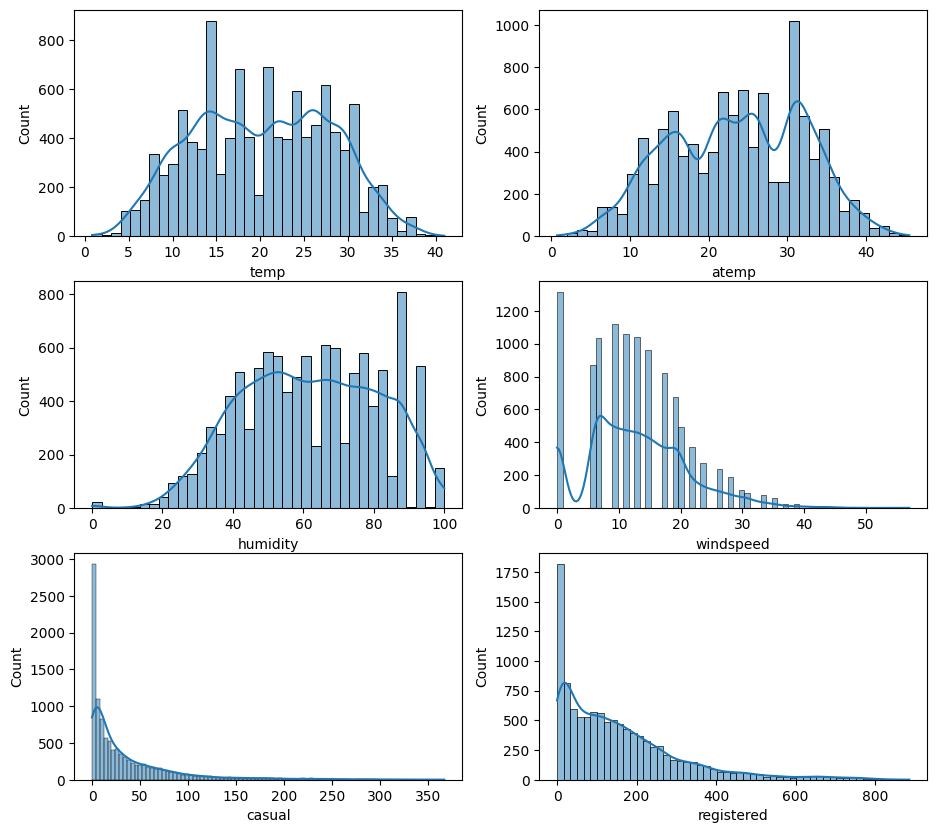

In [ ]:
#numerical univariate analysis

numerical_columns= ['temp','atemp','humidity','windspeed','casual','registered','count']  #adding all numerical columns to variable "Numerical columns"

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(11,10))
index = 0
for row in range(3):
  for col in range(2):
    sns.histplot(data[numerical_columns[index]], ax=axis[row, col], kde=True) #plotting histograms for each numerical variable
    index += 1
plt.show()



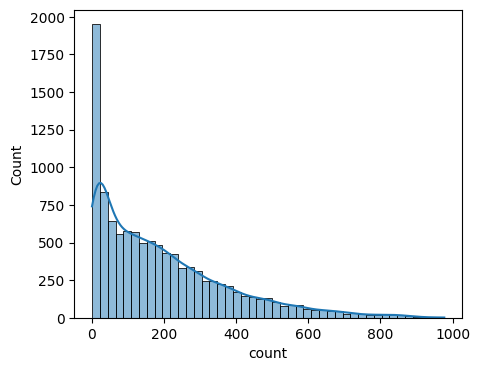

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data[numerical_columns[-1]], kde=True)
plt.show()

Insights:


*   Casual, registered and count appear to follow a right skew. There is a higher concentration of data on the left side of the distribution.
*   This also shows that most values lie below the mean
* And it also shows the potential for outliers
* The histograms show that temp and atemp have an almost symmetrical distribution with temp having a slightly higher desnity of values between 13 and 23(approximately) whereas atemp has a slightly higher density of values between 30 -32 (approxiamtely)


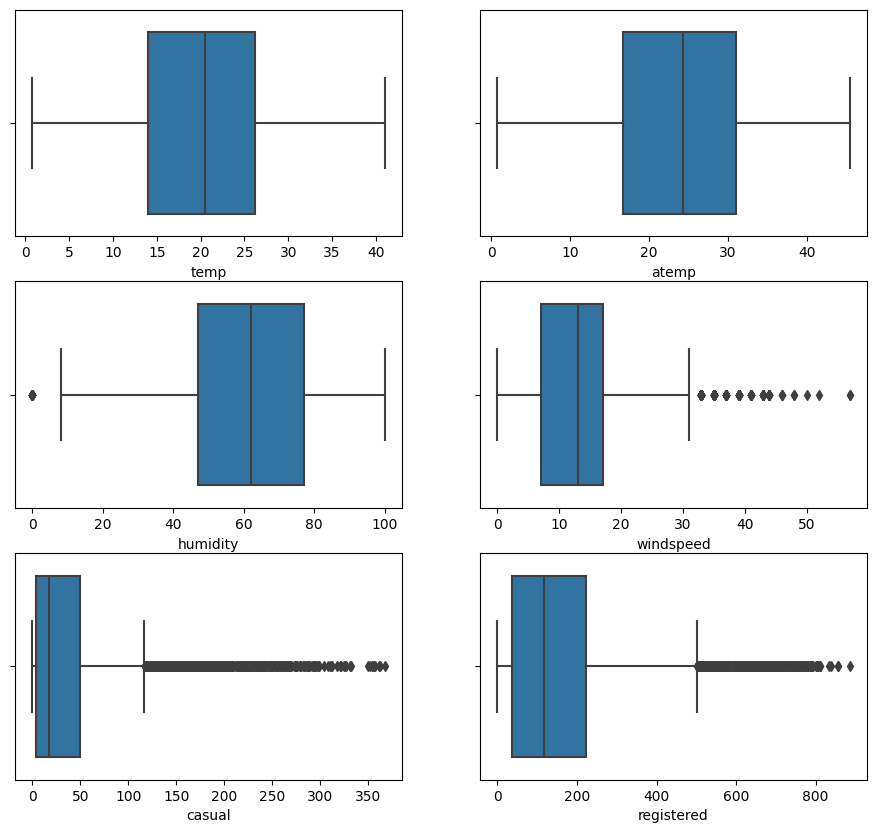

In [ ]:
#detecting outliers in numerical variables


fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(11, 10))
index = 0
for row in range(3):
  for col in range(2):
    sns.boxplot(x=data[numerical_columns[index]], ax=axis[row, col])
    index += 1
plt.show()



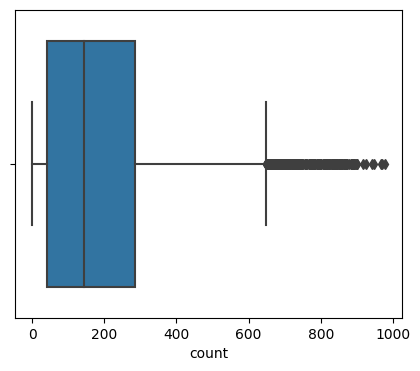

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data[numerical_columns[-1]])
plt.show()

Insights: This proves the presence of outliers in casual, registered, count and windspeed

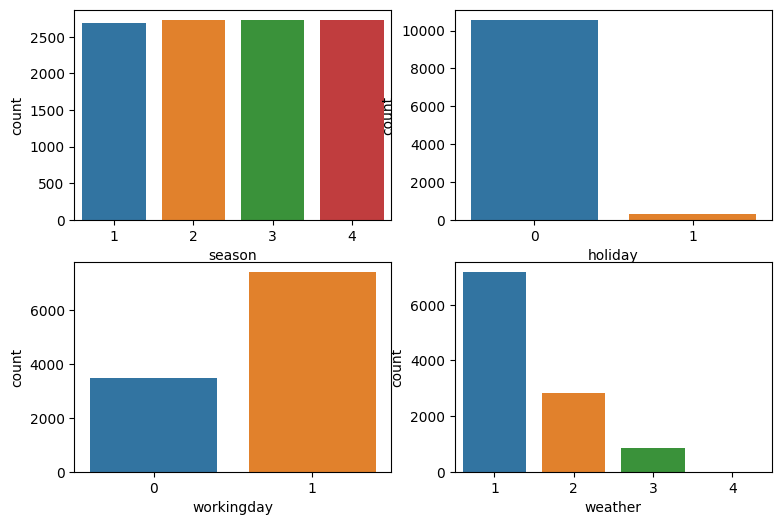

In [ ]:
#categorical univariate analysis

categorical_columns= ['season','holiday','workingday','weather']   #adding all categorical columns to variable "Categorical_columns"

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(9,6))
index = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data =data , x=data[categorical_columns[index]], ax=axis[row, col])
    index += 1
plt.show()


Insights:


*   Working days are more in number
*   Clear, Few clouds, partly cloudy, partly cloudy seem to be the most common weather type followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* It is almost never in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather
* All 4 seasons seem equally distributed



#Bivariate analysis

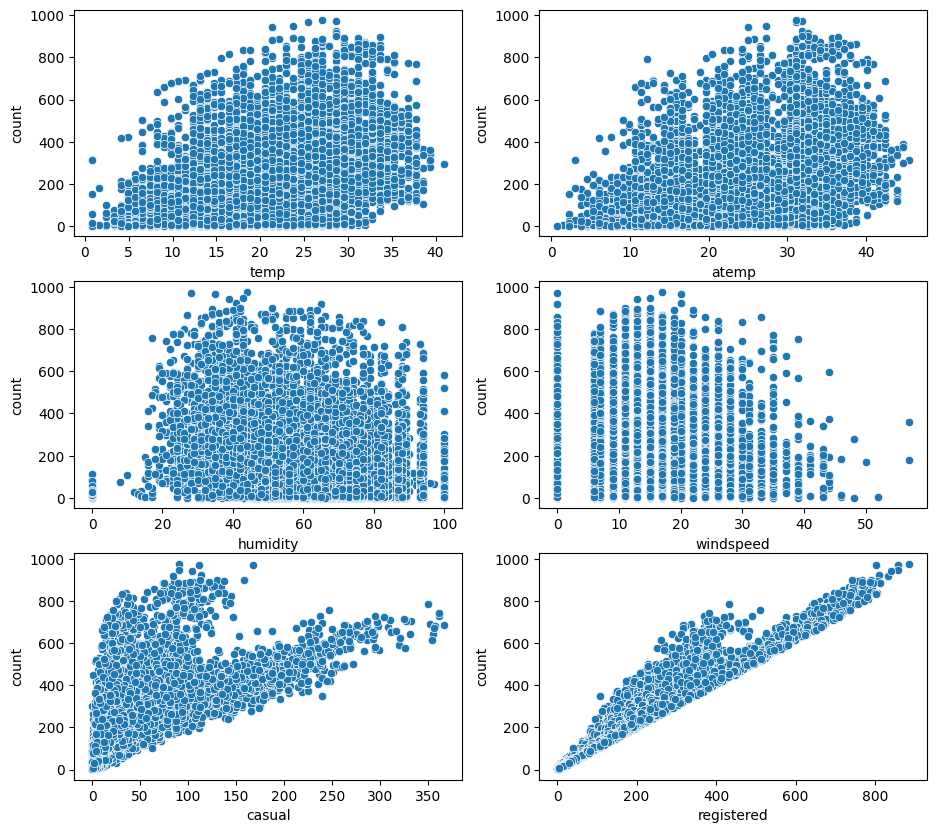

In [ ]:
#numerical vs count

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(11,10))
index = 0
for row in range(3):
  for col in range(2):
    sns.scatterplot(data=data, x=numerical_columns[index], y=data['count'],ax=axis[row, col])
    index += 1
plt.show()

Insights:


*   There appears to be an increase in bike rentals as temperature increases
*   There appears to be a drastic increase in users from humidity level of approximately 20 and windspeed of approximately 5



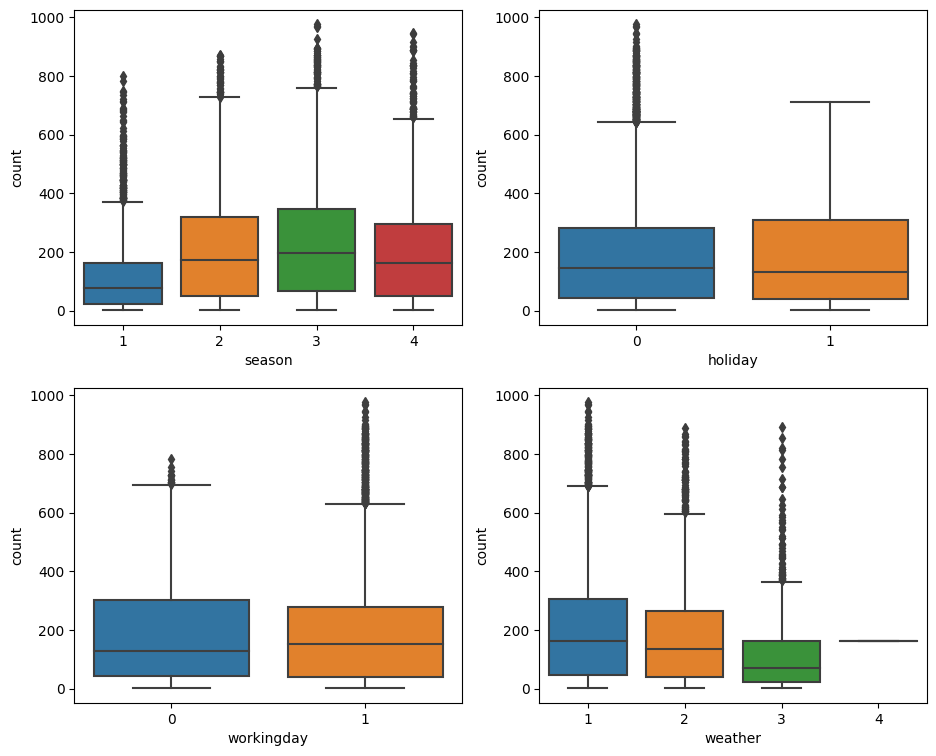

In [ ]:
# categorical vs count

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(11,9))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=data, x=categorical_columns[index], y=data['count'],ax=axis[row, col])
    index += 1
plt.show()

Insights:


*   Summer and fall appaer to have the most amount of bikes rented and spring having the least
*   More bikes appear to be rented on a non-working day



#Correlation with count

<ipython-input-65-cd59bcce7967>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap='coolwarm')


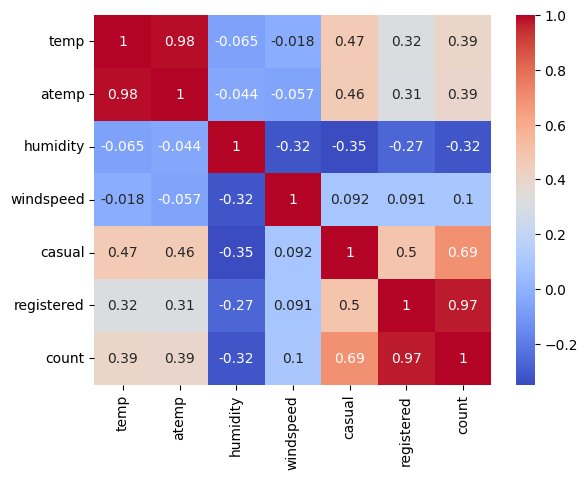

In [ ]:
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.show()

Insights:


*   There appears to be a strong correlation between registered users and bikes rented
* There also appears to be a strong relation between temp and atemp
* Count has a negative corelation with humidity


#Hypothesis testing



*  We perform the chisquared test on the variables "Season" and "Weather" as they are 2 categorical variables
*  H0(Null Hypothesis): Weather is not dependant on season
* Ha(Alternate Hypothesis) : Weather is dependant on season
* We take a significance level(Alpha) of 0.05 i.e 95% confidence



In [ ]:
#weather vs seasons

weather_season = pd.crosstab(data["season"],data["weather"])
print(weather_season)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [ ]:
alpha = 0.05
chi_stat,p_value,df,exp_freq = chi2_contingency(weather_season)
print("chi stat=",chi_stat)
print("p=",p_value)
print("DOF=",df)
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

chi stat= 49.158655596893624
p= 1.549925073686492e-07
DOF= 9
Reject Ho


Insight: We find that the p_value is very small for this test thus we can reject the null hypothesis and say that the weather is dependant on the season




#Working day vs bike rentals

*  We perform the 2sample T-test on the variable "Working day" to see if it has any effect on the number of bikes rented.
*  H0(Null Hypothesis): Working day has no effect on bike rentals
* Ha(Alternate Hypothesis) : Working day has an effect on bike rentals
* We take a significance level(Alpha) of 0.05 i.e 95% confidence


In [ ]:
#T-test working days vs non working days

non_workingday = data[data['workingday']==0]['count']
workingday = data[data['workingday']==1]['count']

alpha = 0.05

t_test, p_value = ttest_ind(non_workingday,workingday)
print("T_Stat:",t_test)
print("P_value:",p_value)
print("p=",p_value)
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

T_Stat: -1.2096277376026694
P_value: 0.22644804226361348
p= 0.22644804226361348
Failed to reject Ho


Insight: We faied to reject the null hypothesis and thus we find no statistically significant correlation between working day and bike rentals.

#Weather, season vs bike rentals

*  We perform the ANOVA test on the multiple variable of "Season" and "Weather" to see if it has any effect on the number of bikes rented.
*  H0(Null Hypothesi season have an impact on the number of bikes renteds): seasons have no impact on the number of bikes rented
* Ha(Alternate Hypothesis) : seasons have an impact on the number of bikes rented
* We take a significance level(Alpha) of 0.05 i.e 95% confidence

In [ ]:
season_1 = data[data['season']==1]['count']
season_2 = data[data['season']==2]['count']
season_3 = data[data['season']==3]['count']
season_4 = data[data['season']==4]['count']
seasons = [season_1,season_2,season_3,season_4]



Before performing the ANOVA test, we check to see if the data is gaussian







In [ ]:
#kruskal test

# H0: Data is Gaussian
# Ha: Data is not Gaussian

k_stat,p_value = kruskal(season_1,season_2,season_3,season_4)
print("K stat =",k_stat)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

K stat = 699.6668548181988
p = 2.479008372608633e-151
Reject Ho


Insight:

* We find that after performing the Kruskal test, none of the seasons follow a normal distribution
* We can also confirm this by using a visual test of qqplot

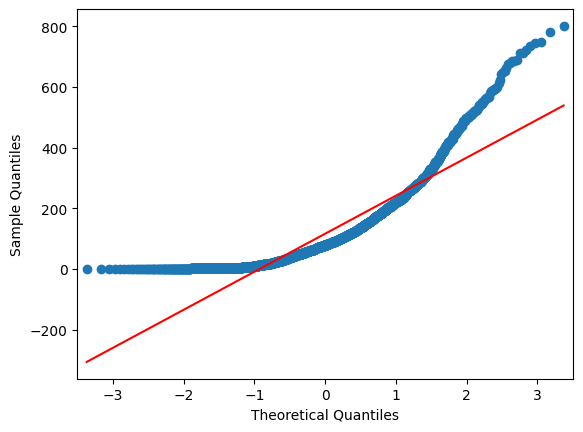

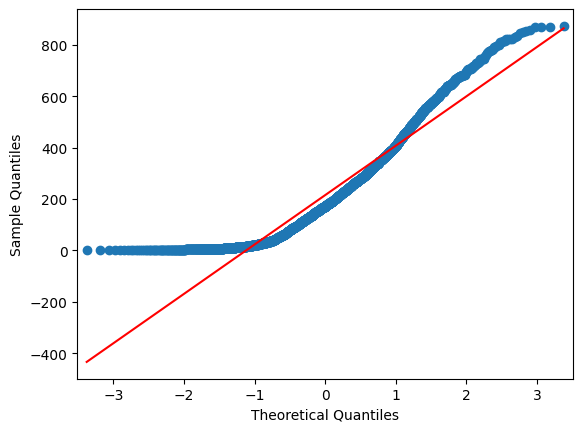

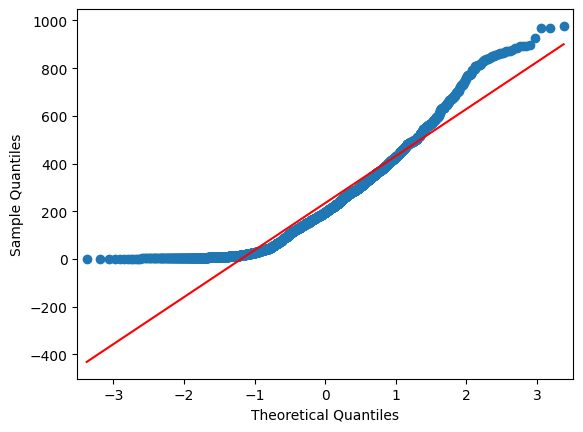

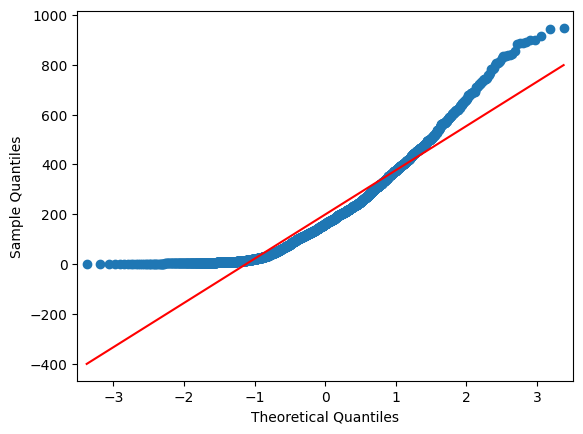

In [ ]:
index = 0
for row in range(4):
  # for col in range(2):
    qqplot(seasons[index], line="s")
    index += 1
plt.show()

Insight: Therefore the visual analysis using qqplot confirms that the seasons don't follow a gaussian distribution

In [ ]:
#levenes test

# H0: Variances are similar
# Ha: variances are not similar

levene_test,p_value = levene(season_1,season_2,season_3,season_4)
print("L stat =",levene_test)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

L stat = 187.7706624026276
p = 1.0147116860043298e-118
Reject Ho


Insight :

*   With a very low p_value, we can confirm that the data does not have similar variances
*   Therfore the assumptions of ANOVA failed


In [ ]:
#ANOVA test

# H0(Null Hypothesis): seasons have no impact on the number of bikes rented
# Ha(Alternate Hypothesis) : seasons have an impact on the number of bikes rented

f_stat,p_value = f_oneway(season_1,season_2,season_3,season_4)
print("f stat =",f_stat)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")


f stat = 236.94671081032106
p = 6.164843386499654e-149
Reject Ho


Insight:
An ANOVA test on different seasons with respect to count shows that count means under different seasons are not the same. Since we reject our null hypothesis, seasons have an impact on the number of bikes rented

*  H0(Null Hypothesis) : weather has no impact on the number of bikes rented
* Ha(Alternate Hypothesis) : weather has an impact on the number of bikes rented
* We take a significance level(Alpha) of 0.05 i.e 95% confidence

In [ ]:
# count vs weather


weather_1 = data[data['weather']==1]['count']
weather_2 = data[data['weather']==2]['count']
weather_3 = data[data['weather']==3]['count']
weather_4 = data[data['weather']==4]['count']
weathers = [weather_1,weather_2,weather_3,weather_4]


In [ ]:
#kruskal test

# H0: Data is Gaussian
# Ha: Data is not Gaussian

k_stat,p_value = kruskal(weather_1,weather_2,weather_3,weather_4)
print("K stat =",k_stat)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

K stat = 205.00216514479087
p = 3.501611300708679e-44
Reject Ho


Insight:

* We find that after performing the Kruskal test, Weather doesn't follow a normal distribution either
* We can also confirm this by using a visual test of qqplot

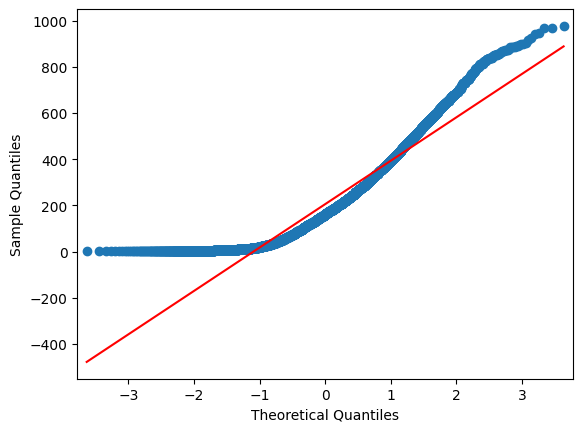

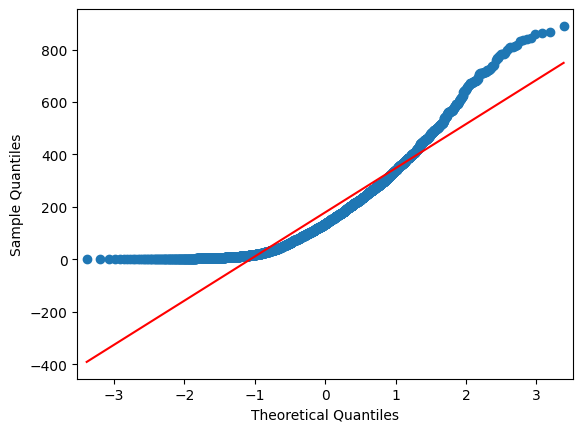

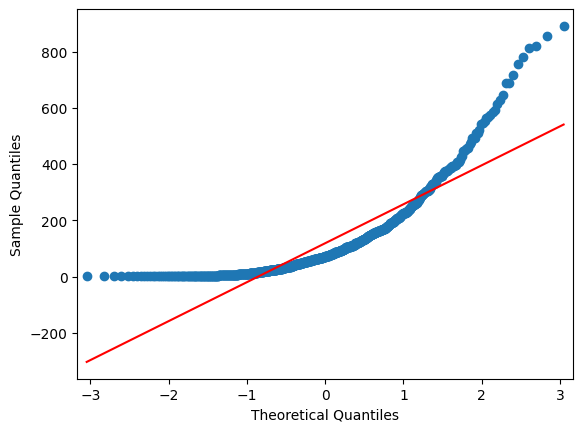

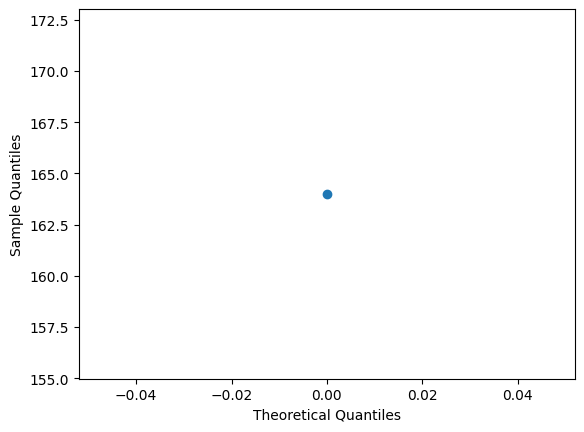

In [ ]:
index = 0
for row in range(2):
   for col in range(2):
    qqplot(weathers[index], line="s")
    index += 1
plt.show()

Insight: Therefore the visual analysis using qqplot confirms that the weather doesn't follow a gaussian distribution

In [ ]:
#levenes test

# H0: Variances are similar
# Ha: variances are not similar

levene_test,p_value = levene(weather_1,weather_2,weather_3,weather_4)
print("L stat =",levene_test)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

L stat = 54.85106195954556
p = 3.504937946833238e-35
Reject Ho


Insight :

*   With a very low p_value, we can confirm that the data does not have similar variances
*   Therfore the assumptions of ANOVA failed

In [ ]:
#ANOVA test

# H0(Null Hypothesis) : weather has no impact on the number of bikes rented
# Ha(Alternate Hypothesis) : weather has an impact on the number of bikes rented

f_stat,p_value = f_oneway(weather_1,weather_2,weather_3,weather_4)
print("f stat =",f_stat)
print("p =",p_value)
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")


f stat = 65.53024112793271
p = 5.482069475935669e-42
Reject Ho


Insight:
An ANOVA test on different weather with respect to count shows that count means in different weather are not the same. Since we reject our null hypothesis, weather has an impact on the number of bikes rented

#Business Reccomendations:

1. **Weather and Seasonal Strategies**: Given that both weather and seasons significantly impact bike rentals, businesses can strategize their operations based on weather forecasts and seasonal patterns. For example, during the winter season, when Weather 1 (Clear, Few clouds) is common, businesses can ensure bike availability and promotions to encourage winter cycling.
4. **Seasonal Promotions and Events**: Capitalize on the popularity of certain seasons (like summer and fall) by organizing special biking events or promotions. For instance, organizing fall-themed biking tours during the autumn season could attract more users
5. **Weather-Dependent Services**: Offering weather-dependent services, such as bike maintenance during rainy seasons or guided tours during pleasant weather, can enhance user experience and loyalty.
2. **Registered Users**: Registered users contribute more to bike rentals. The company could focus on loyalty programs or incentives for registered users to maintain customer retention and encourage repeat business.
3. **Working day**: We found that working day has no effect on bike rentals and the company could focus on pushing bike rentals to working individuals for communting to work as an alternative.
5. **Day-of-the-Week Strategies**: More bikes are rented on non-working days. Businesses can focus their marketing efforts and promotions on weekdays to increase rentals during working days. Offers like "Weekday Specials" or "Work Commute Packages" could attract commuters.